# Gaia astrometry of stars in NGC 346

I want to get good positions for all the stars so I can align the HST and the MUSE images

In [1]:
import pandas as pd
from pathlib import Path

## Load the Gaia sources

In [2]:
datapath = Path("../data")

In [3]:
df = pd.read_csv(datapath / "1621565655827O-result.csv")

In [4]:
df

,source_id,ra,dec,parallax,parallax_error,phot_g_mean_mag,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error
0,4689015706366326272,14.756008,-72.175687,NaN,NaN,20.294716,NaN,NaN,NaN
1,4689015740720443264,14.774121,-72.175634,NaN,NaN,17.988510,NaN,NaN,NaN
2,4689015740720444416,14.778689,-72.174959,NaN,NaN,19.425655,NaN,NaN,NaN
3,4689015740720453248,14.768236,-72.178498,NaN,NaN,20.794594,NaN,NaN,NaN
4,4689015633299729280,14.770011,-72.184157,0.016128,0.024835,15.316664,-0.110934,NaN,NaN
...,...,...,...,...,...,...,...,...,...
453,4689015740726064768,14.766470,-72.173194,NaN,NaN,19.016130,NaN,NaN,NaN
454,4689015740726065280,14.776947,-72.176877,NaN,NaN,18.584770,NaN,NaN,NaN
455,4689015740726065664,14.770803,-72.177730,4.978903,0.602634,19.153454,NaN,NaN,NaN
456,4689015740726067712,14.771133,-72.174048,NaN,NaN,20.368100,NaN,NaN,NaN


## Plot all the Gaia sources

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_color_codes()
sns.set_context("talk")

I set the color scale to be the magnitude

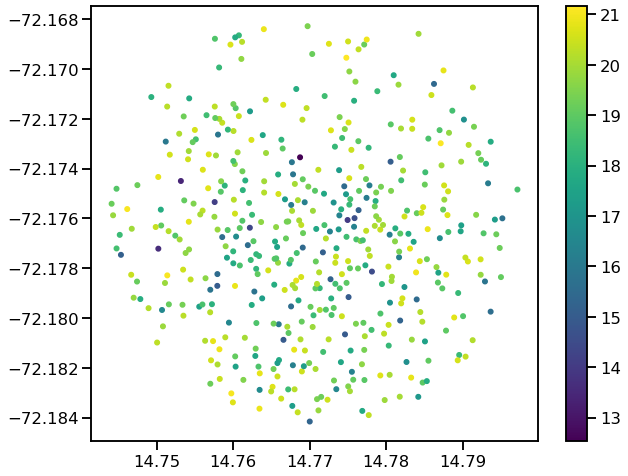

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
scat = ax.scatter(
    x="ra", y="dec", c="phot_g_mean_mag", 
    data=df,
    s=20,
)
cb = fig.colorbar(scat, ax=ax)

So you can see the mass segregation straight away - the darker ones (brighter) tend to be more concentrated towards the center.  It looks like Gaia must have missed quite a lot of them though.

*Note that the RA axis is the wrong way round* 

## Load an HST image

We will start off with the UV one.

In [48]:
import numpy as np

In [12]:
from astropy.io import fits
from astropy.wcs import WCS

In [13]:
bigdatapath = Path("../big-data")

In [14]:
hdulist = fits.open(
    bigdatapath / 
    "HST-NGC346/hst_10248_03_acs_hrc_f330w_f220w/hst_10248_03_acs_hrc_f330w_f220w_sci.fits")

In [15]:
hdulist.info()

Filename: ../big-data/HST-NGC346/hst_10248_03_acs_hrc_f330w_f220w/hst_10248_03_acs_hrc_f330w_f220w_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      95   (1931, 1595, 3)   float32   


## Plot the image in celestial coordinates with Gais sources overlaid

In [16]:
w = WCS(hdulist[0].header).celestial

In [17]:
imdata = hdulist[0].data[0, :, :]

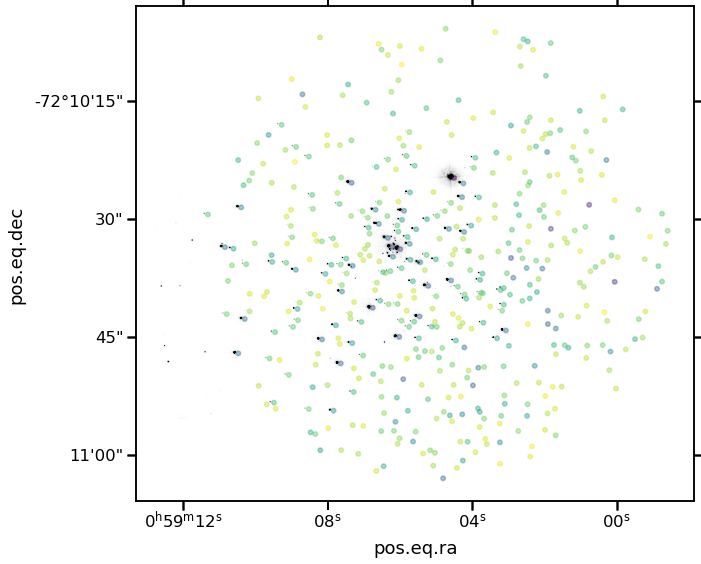

In [30]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=w)
ax.imshow(imdata, vmin=0.0, vmax=5.0, cmap="gray_r")
scat = ax.scatter(
    x="ra", y="dec", c="phot_g_mean_mag", 
    data=df,
    s=20, 
    alpha=0.4,
    transform=ax.get_transform('world'),
)

This shows that the HST coordinates are cbot quite right – there is an offset from the Gaia coordinates.

We will zoom in on the central cluster to have a closer look.

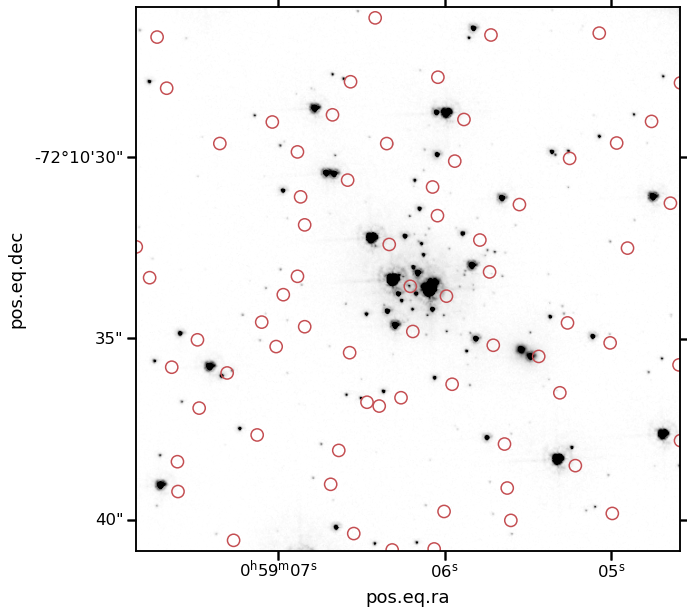

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=w)
ax.imshow(imdata, vmin=0.0, vmax=5.0, cmap="gray_r")
scat = ax.scatter(
    x="ra", y="dec", edgecolors="r", 
    data=df,
    s=150, 
    alpha=1.0,
    facecolor="none",
    transform=ax.get_transform('world'),
)
ax.set(
    xlim=[1000, 1600],
    ylim=[600, 1200],
);

## Adjust the WCS to align HST with Gaia

Now, try giving an offset to fix this.  We could either change `CRPIX` or the `CRVAL`, but the first seems simpler to reason about.  We want to move the HST stars to the right and down, so do the opposite to the reference pixel:

In [64]:
ww = WCS(hdulist[0].header).celestial
ww.wcs.crpix

array([966., 798.])

In [65]:
ww.wcs.crpix -= np.array([19, -7])

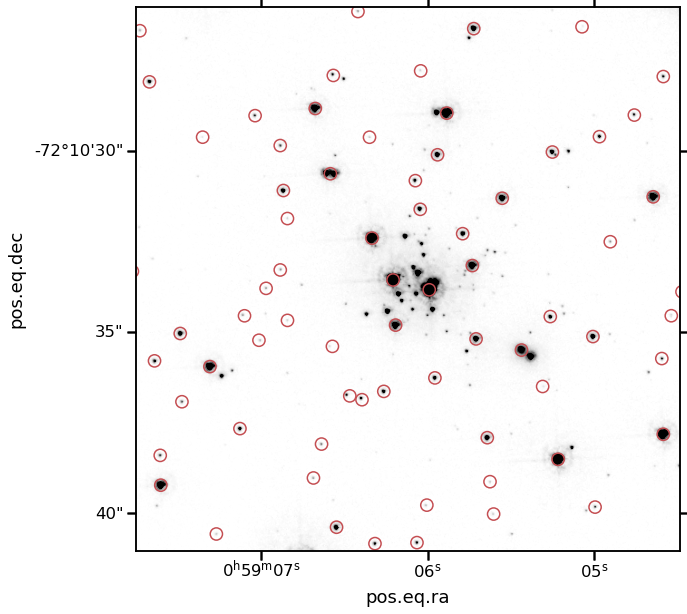

In [66]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ww)
ax.imshow(imdata, vmin=0.0, vmax=5.0, cmap="gray_r")
scat = ax.scatter(
    x="ra", y="dec", edgecolors="r", 
    data=df,
    s=150, 
    alpha=1.0,
    facecolor="none",
    transform=ax.get_transform('world'),
)
ax.set(
    xlim=[1000, 1600],
    ylim=[600, 1200],
);

That looks pretty good. 

## Repeat for the Hα image

In [102]:
acspath = bigdatapath / "HST-NGC346/hst_10248_a3_acs_wfc_f658n"
hdulist_acs = fits.open(
    acspath / "hst_10248_a3_acs_wfc_f658n_drz.fits"
)

In [103]:
hdulist_acs.info()

Filename: ../big-data/HST-NGC346/hst_10248_a3_acs_wfc_f658n/hst_10248_a3_acs_wfc_f658n_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     825   ()      
  1  SCI           1 ImageHDU        86   (4563, 4442)   float32   
  2  WHT           1 ImageHDU        46   (4563, 4442)   float32   
  3  CTX           1 ImageHDU        39   (4563, 4442)   int32   
  4  HDRTAB        1 BinTableHDU    631   6R x 311C   [9A, 3A, J, D, D, D, D, D, D, D, D, D, D, D, D, D, J, 3A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, J, 8A, 23A, D, D, D, D, J, J, J, 8A, J, 23A, 9A, 19A, J, 4A, J, J, J, J, J, J, 23A, D, D, D, D, J, J, 3A, 3A, 4A, 4A, J, D, D, D, 3A, 1A, J, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, J, D, 6A, 9A, 8A, D, D, J, 4A, 18A, 3A, J, 5A, 7A, 3A, D, 13A, 8A, 4A, 3A, J, J, J, J, J, J, J, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, J, 1A, 3A, 1A, D, 3A

In [105]:
wacs = WCS(hdulist_acs["SCI"].header)
imdata_acs = hdulist_acs["SCI"].data.astype("float")

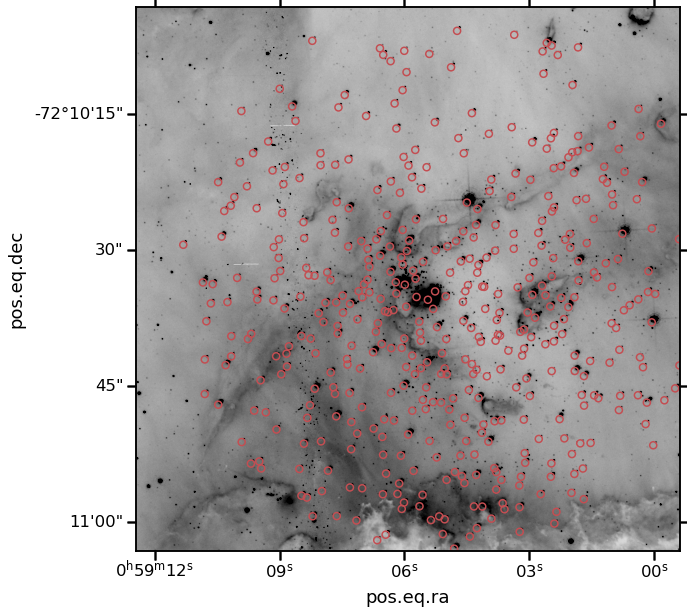

In [111]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=wacs)
ax.imshow(imdata_acs, vmin=0.0, vmax=1.0, cmap="gray_r")
scat = ax.scatter(
    x="ra", y="dec", edgecolors="r", 
    data=df,
    s=50, 
    alpha=1.0,
    facecolor="none",
    transform=ax.get_transform('world'),
)
ax.set(
    xlim=[2000, 3200],
    ylim=[1600, 2800],
);

Zoom in some more and switch to a logarithmic brightness scaling:

<ipython-input-114-09d553270bc9>:4: RuntimeWarning: divide by zero encountered in log10
  np.log10(imdata_acs),
<ipython-input-114-09d553270bc9>:4: RuntimeWarning: invalid value encountered in log10
  np.log10(imdata_acs),


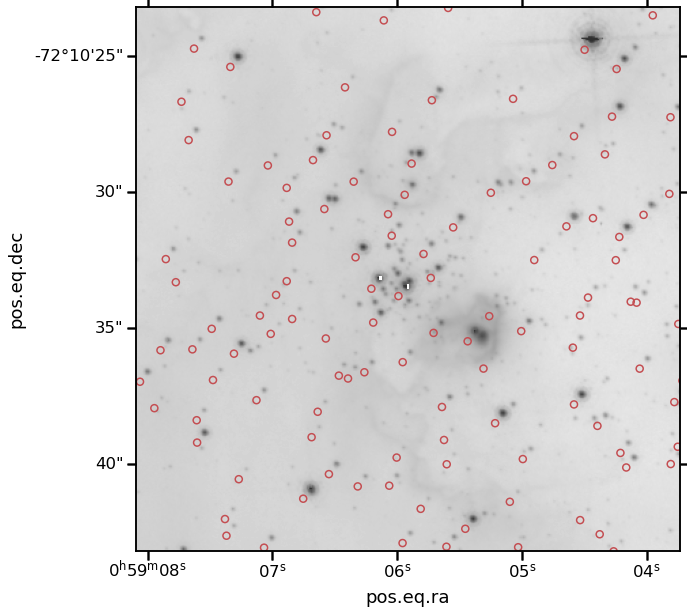

In [114]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=wacs)
ax.imshow(
    np.log10(imdata_acs), 
    vmin=-1.0, vmax=3.0, 
    cmap="gray_r",
)
scat = ax.scatter(
    x="ra", y="dec", edgecolors="r", 
    data=df,
    s=50, 
    alpha=1.0,
    facecolor="none",
    transform=ax.get_transform('world'),
)
ax.set(
    xlim=[2400, 2800],
    ylim=[2000, 2400],
);

This time, the whift is up and to the right. Let's try and fix it:

In [121]:
wacs_fix = WCS(hdulist_acs["SCI"].header)
wacs_fix.wcs.crpix += np.array([6, 7.5])

<ipython-input-122-0158693904af>:4: RuntimeWarning: divide by zero encountered in log10
  np.log10(imdata_acs),
<ipython-input-122-0158693904af>:4: RuntimeWarning: invalid value encountered in log10
  np.log10(imdata_acs),


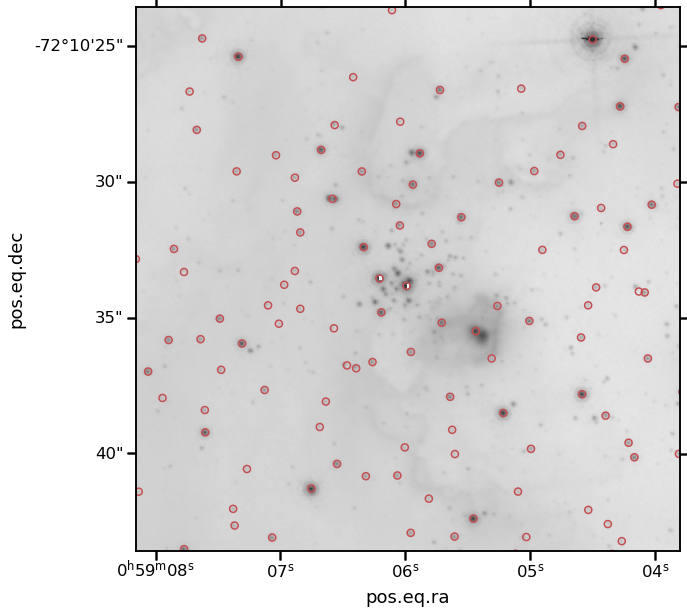

In [122]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=wacs_fix)
ax.imshow(
    np.log10(imdata_acs), 
    vmin=-1.0, vmax=3.0, 
    cmap="gray_r",
)
scat = ax.scatter(
    x="ra", y="dec", edgecolors="r", 
    data=df,
    s=50, 
    alpha=1.0,
    facecolor="none",
    transform=ax.get_transform('world'),
)
ax.set(
    xlim=[2400, 2800],
    ylim=[2000, 2400],
);

### Load the DAOPHOT source list

The HST data came with some data tables that seem to

In [71]:
from astropy.io import ascii

In [92]:
stars = ascii.read(
    str(acspath / "hst_10248_a3_acs_wfc_f658n_daophot_trm.cat"),
    format="commented_header",
    header_start=56,
)

In [90]:
stars

c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100,c101,c102,c103,c104,c105,c106,c107,c108,c109,c110,c111,c112,c113,c114,c115,c116,c117,c118,c119,c120,c121,c122,c123,c124,c125,c126,c127,c128,c129,c130,c131,c132
float64,float64,float64,float64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
4542.927,253.301,14.6863747,-72.2029149,185,-999,-999,1.135,0,23.978,0.2019,0.33018,0.061371,22.844,0.2033,0.93869,0.17572,0.1085,0,7,1.3503e-09,23.303,0.1604,0.61485,0.090831,22.901,0.1922,0.89071,0.15767,4.99,22.788,0.2199,0.98791,0.20005,22.788,0.2199,0.98791,0.20005,0.046087,19.637,0.14164,18.392,7,5,5,5,4,3,2,1,4542,252,4544,254,0.54034,0.0035519,0.43353,0.0029793,-0.012247,-2.386e-05,1.8519,-999,2.3081,-999,0.1046,-999,0.736,0.0596,0.657,0.0546,-6.5,-2.4,2.31,14.6864,-72.2029,1.04236e-10,6.85179e-13,8.36252e-11,-999,2.32715e-12,-999,8.36252e-05,-999,0.000104236,-999,-4.65424e-06,-8.82616e-09,1.02223e-05,8.27862e-07,9.13048e-06,7.5798e-07,6.4,2.3,3.21e-05,1.12,0.107,83.6,87.7,14.2642,-72.4725,83.9,87.9,14.6864,-72.2029,83.6,87.7,0.01,-0.002992,0.003898,-0.01212,-0.0009393,0.006638,0.006627,0.05621,0.0516,0.03334,-0.005748,0.03821,0.1188,0.1416,0.07756,0.01662,0.02831,0.08514,0.09265,0.04747,0.03415,0.01857,0.02313,0.03582,0.01143,-0.01192
4532.562,345.399,14.6868527,-72.201636,410,-999,-999,0.929,0,23.45,0.1282,0.53713,0.063428,22.521,0.1576,1.2641,0.18344,0.1005,0,9,1.7361e-09,22.723,0.1179,1.0495,0.11398,22.382,0.1421,1.4364,0.18788,4.33,22.444,0.1806,1.3561,0.22552,22.444,0.1806,1.3561,0.22552,0.046017,19.637,0.19688,18.034,9,7,5,4,4,4,3,3,4531,344,4534,347,0.83013,0.0027235,0.6457,0.0021592,0.065399,0.0002106,1.2143,-999,1.5612,-999,-0.246,-999,0.922,0.0529,0.79,0.0457,17.7,18.4,2.14,14.6869,-72.2016,1.60111e-10,5.25289e-13,1.24577e-10,-999,-1.26761e-11,-999,0.000124577,-999,0.000160111,-999,2.53519e-05,8.16077e-08,1.28129e-05,7.34098e-07,1.09781e-05,6.34797e-07,-17.8,-18.4,2.97e-05,1.17,0.143,-72.3,-71.6,14.2647,-72.4712,-72.0,-71.3,14.6869,-72.2016,-72.3,-71.6,0.94,0.001823,0.0002917,0.004452,0.0065,0.006958,0.03273,0.04114,0.02591,0.02021,0.01429,0.05617,0.1843,0.1836,0.06838,0.01316,0.04516,0.1341,0.1969,0.05081,0.002587,0.02518,0.02881,0.06303,0.02374,0.01298
4519.042,449.049,14.687475,-72.2001967,653,-999,-999,1.15,0,23.606,0.1469,0.46535,0.062952,22.456,0.1426,1.342,0.17618,0.09271,0,7,1.3503e-09,22.905,0.126,0.88748,0.10293,22.586,0.1518,1.1899,0.1663,4.52,22.385,0.1555,1.4326,0.20516,22.385,0.1555,1.4326,0.20516,0.045913,19.615,0.26127,17.727,7,6,5,4,3,1,1,1,4518,448,4520,450,0.5969,0.0021725,0.60249,0.0021792,0.020516,2.437e-05,1.6773,-999,1.6617,-999,-0.1142,-999,0.788,0.0469,0.761,0.0464,48.9,48.9,1.83,14.6875,-72.2002,1.15136e-10,4.19072e-13,1.16227e-10,-999,-3.9558e-12,-999,0.

In [86]:
ascii.read?